In [1]:
# Лабораторная работа 2

In [2]:
# Часть 1. OpenCV

In [5]:
import numpy as np
import cv2 as cv
import sys

In [6]:
sys.path.append('C:/Users/79023/Desktop/lab2')

In [7]:
from utility import util

In [8]:
image = cv.imread('../images/lab2.jpg')

In [9]:
image

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

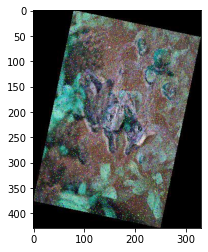

In [10]:
# Использование библиотеки matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

#%matplotlib inline позволяет выводить графики matplotlib в Jupyter
plt.imshow(image)

In [11]:
#поменяем цветовое пространство на RGB, по причине некорректного вывода cv.imread() 

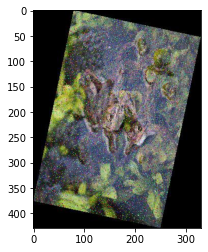

In [12]:
rgb_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(rgb_image)

In [13]:
# Операции с изображениями - кадрирование

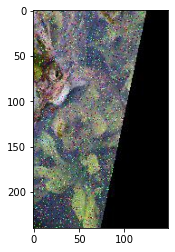

In [14]:
ROI = (182, 162, 220, 240)  #(x0, y0, height, width)
cropped_image = rgb_image[ROI[1]:ROI[1] + ROI[3], ROI[0]:ROI[0] + ROI[2]]
plt.imshow(cropped_image)

In [15]:
# Изменение размера изображения

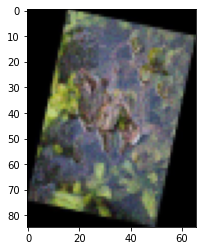

In [16]:
scale_percent = 20  # Процент от изначального размера
width = int(rgb_image.shape[1] * scale_percent / 100)
height = int(rgb_image.shape[0] * scale_percent / 100)
dim = (width, height)
resized_image = cv.resize(rgb_image, dim, interpolation=cv.INTER_AREA)
plt.imshow(resized_image)

In [17]:
# Поворот изображения

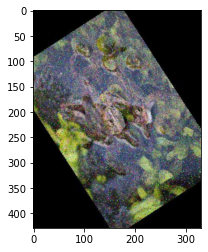

In [18]:
(h, w, d) = rgb_image.shape
angle = 45
scale = 1.0
center = (w // 2, h // 2)
M = cv.getRotationMatrix2D(center, angle, scale)
rotated = cv.warpAffine(rgb_image, M, (w, h))
plt.imshow(rotated)

In [19]:
# Рисование на изображении

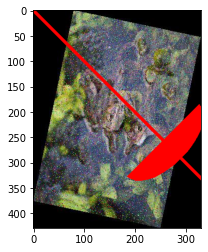

In [20]:
copy_image = rgb_image.copy()
cv.line(copy_image, (0, 0), (511, 511), (255, 0, 0), 5)
cv.rectangle(copy_image, (384, 0), (510, 128), (0, 255, 0), 3)
cv.circle(copy_image, (447, 63), 63, (0, 0, 255), -1)
cv.ellipse(copy_image, (256, 256), (100, 50), -45, 0, 180, (255, 0, 0), -1)
plt.imshow(copy_image)

In [21]:
# Наложение текста

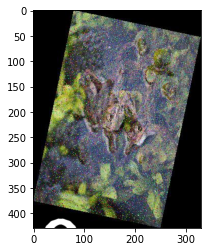

In [22]:
copy_image = rgb_image.copy()
font = cv.FONT_HERSHEY_COMPLEX
cv.putText(rgb_image, 'OpenCV', (10, 500), font, 4, (255, 255, 255), 10, cv.LINE_AA)
plt.imshow(rgb_image)

In [23]:
# Часть 2. Гистограммная обработка изображения

In [24]:
# Изменим стандартный размер графиков matplotlib
plt.rcParams["figure.figsize"] = [6, 4]

In [27]:
image1 = cv.imread('../images/lab2.jpg')
#image2 = cv.imread('C:/Users/79023/Desktop/lab2/images/winter_cat.png')
rgb_image1 = cv.cvtColor(image1, cv.COLOR_BGR2RGB)
rgb_image2 = cv.cvtColor(image2, cv.COLOR_BGR2RGB)
gray_image1 = cv.cvtColor(image1, cv.COLOR_BGR2GRAY)
gray_image2 = cv.cvtColor(image2, cv.COLOR_BGR2GRAY)

channels = [0]
histSize = [256]
range1 = [0, 256]

hist1 = cv.calcHist([gray_image1], channels, None, histSize, range1)
hist2 = cv.calcHist([gray_image2], channels, None, histSize, range1)

gs = plt.GridSpec(2, 2)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(gray_image1, cmap='gray')
plt.subplot(gs[1])
plt.imshow(gray_image2, cmap='gray')
plt.subplot(gs[2])
plt.hist(gray_image1.reshape(-1), 256, range1)
plt.subplot(gs[3])
plt.hist(gray_image2.reshape(-1), 256, range1)
plt.show()

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [24]:
# Получение гистограммы с помощью matplotlib

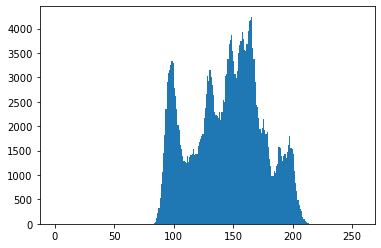

In [25]:
plt.hist(gray_image1.reshape(-1), 256, range1)
plt.show()

In [26]:
# Визуализация гистограммы по цветовым каналам с помощью OpenCV

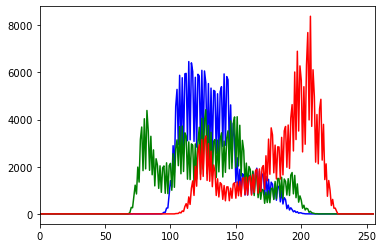

In [27]:
histSize = [256]
range1 = [0, 256]


def plot_rgb_hist(image, histSize, range):
    histSize = [256]
    range = [0, 256]
    for i, col in enumerate(['b', 'g', 'r']):
        hist = cv.calcHist([image], [i], None, histSize, range)
        plt.plot(hist, color=col)
        plt.xlim(range)


plot_rgb_hist(image1, histSize, range1)
plt.show()

In [28]:
# Яркостные преобразования

In [29]:
# Инверсия

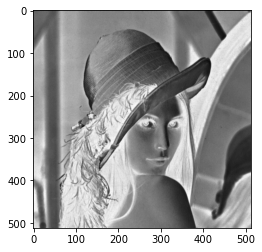

In [30]:
lut = lambda i: 255 - i
invert_image = lut(gray_image1)
plt.imshow(invert_image, cmap='gray')

In [31]:
# Гамма - коррекция

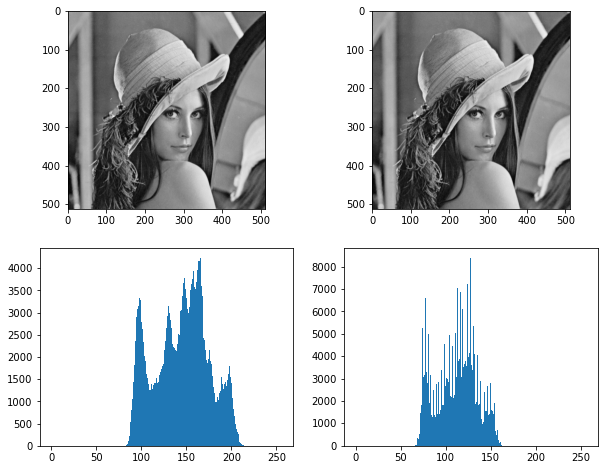

In [32]:
gamma = 0.95
lut = lambda i: i ** gamma
result_image = lut(gray_image1)

gs = plt.GridSpec(2, 2)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(gray_image1, cmap='gray')
plt.subplot(gs[1])
plt.imshow(result_image, cmap='gray')
plt.subplot(gs[2])
plt.hist(gray_image1.reshape(-1), 256, range1)
plt.subplot(gs[3])
plt.hist(result_image.reshape(-1), 256, range1)
plt.show()

In [33]:
# Адаптивная коррекция

In [34]:
# Яркостная нормализация

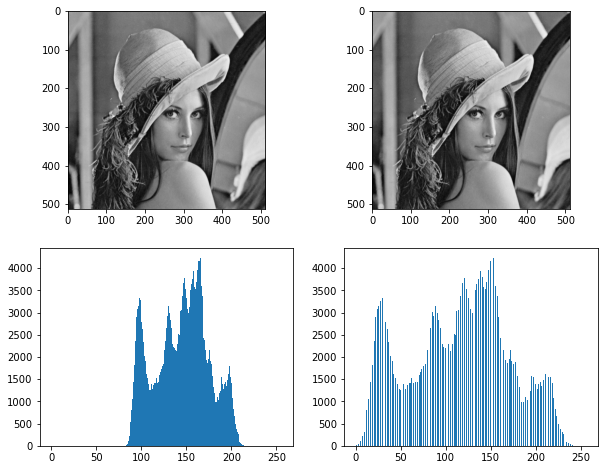

In [35]:
lut = lambda i: 255 * ((i - np.min(i)) / (np.max(i) - np.min(i)))
result_image = lut(gray_image1)

gs = plt.GridSpec(2, 2)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(gray_image1, cmap='gray')
plt.subplot(gs[1])
plt.imshow(result_image, cmap='gray')
plt.subplot(gs[2])
plt.hist(gray_image1.reshape(-1), 256, range1)
plt.subplot(gs[3])
plt.hist(result_image.reshape(-1), 256, range1)
plt.show()

In [36]:
# Эквализация изображения

In [1]:
def sum_i(i, hist):
    sum = 0
    for j in range(i):
        sum += hist[j]
    return sum
        
def sum_255(hist):
    sum = 0
    for j in range(255):
        sum += hist[j]   
    return sum

In [2]:
lut = np.ndarray(256)
arr_sum = sum_255(hist1)
for i in range(lut.size):
    lut[i] = 255 * sum_i(i, hist1) / arr_sum

NameError: name 'np' is not defined

In [3]:
result_image = gray_image1.copy()
for i in range(gray_image1.shape[0]):
    for j in range(gray_image1.shape[1]):
        result_image[i][j] = lut[gray_image1[i][j]]

NameError: name 'gray_image1' is not defined

In [4]:
gs = plt.GridSpec(2, 2)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(gray_image1, cmap='gray')
plt.subplot(gs[1])
plt.imshow(result_image, cmap='gray')
plt.subplot(gs[2])
plt.hist(gray_image1.reshape(-1), 256, range1)
plt.subplot(gs[3])
plt.hist(result_image.reshape(-1), 256, range1)
plt.show()

NameError: name 'plt' is not defined